In [72]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=1.5)

In [73]:
! python3 --version

Python 3.10.9


In [74]:
country_wise = pd.read_csv('country_wise_latest.csv', index_col = 0)
worldometer = pd.read_csv('worldometer_data.csv', index_col =0)


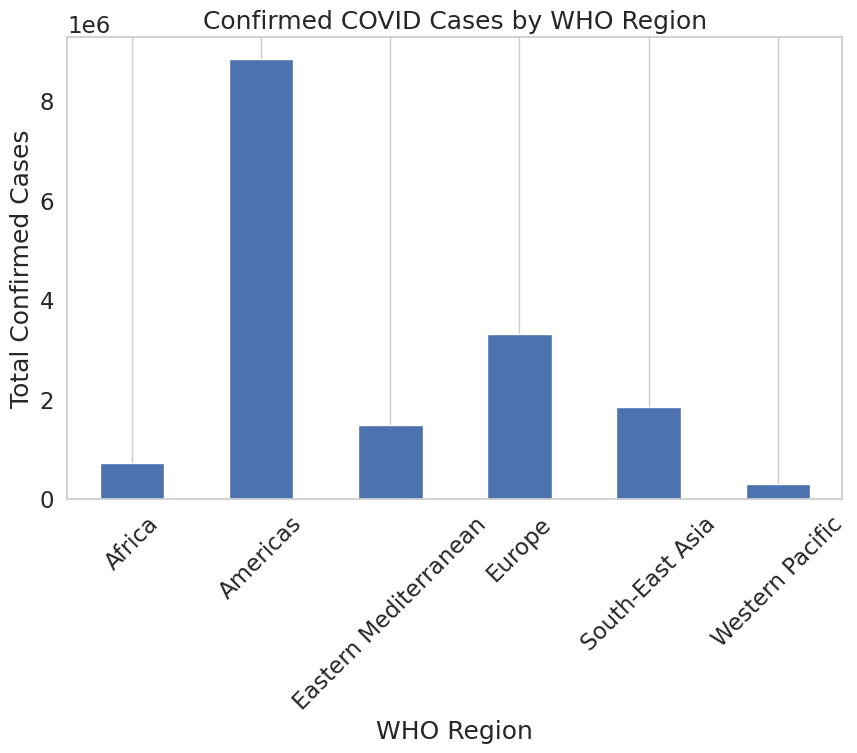

In [75]:
# Group by 'WHO Region' and sum the 'Confirmed' cases
grouped_data = country_wise.groupby('WHO Region')['Confirmed'].sum()

# Plotting the histogram
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Confirmed COVID Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

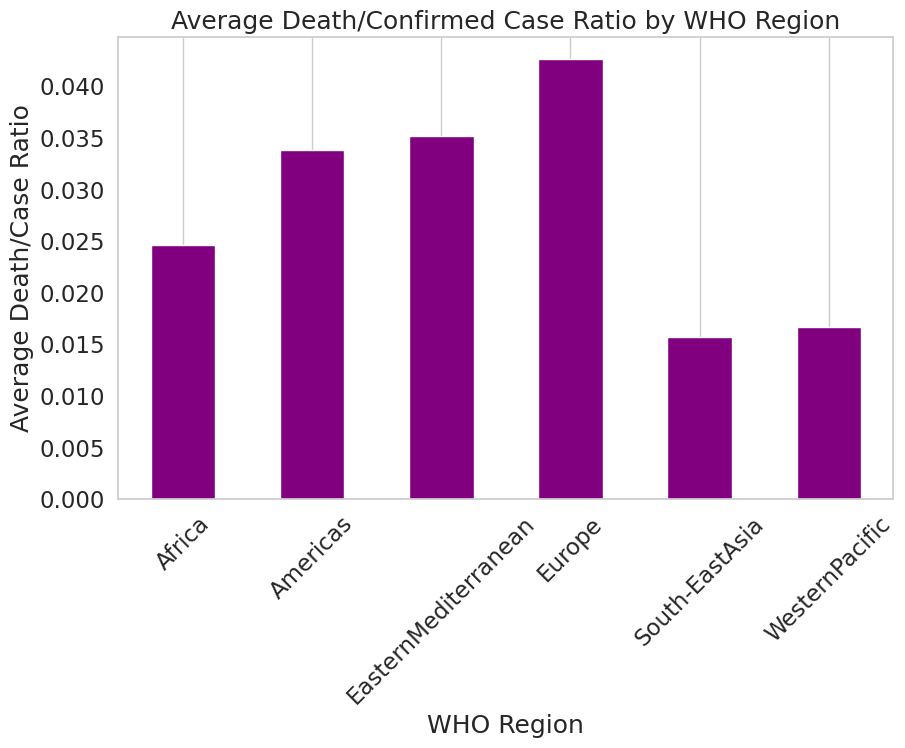

In [79]:
worldometer['Death/Case Ratio'] = worldometer.apply(lambda row: row['TotalDeaths'] / row['TotalCases'] if row['TotalCases'] > 0 else 0, axis=1)
average_death_case_ratio = worldometer.groupby('WHO Region')['Death/Case Ratio'].mean()

# Plotting the average death/case ratio
plt.figure(figsize=(10, 6))
average_death_case_ratio.plot(kind='bar', color='purple')
plt.title('Average Death/Confirmed Case Ratio by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Average Death/Case Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [76]:
gdp_data = pd.read_csv('gdp_per_country.csv')
gdp_2020_data = gdp_data[['Country', '2020']]
gdp_2020_data['Country'] = gdp_2020_data['Country'].str.split(',').str[0]
country_wise = country_wise.reset_index()
death_per_100_cases = country_wise[['Country/Region', 'Deaths / 100 Cases']]
death_per_100_cases

,Country/Region,Deaths / 100 Cases
0,Afghanistan,3.50
1,Albania,2.95
2,Algeria,4.16
3,Andorra,5.73
4,Angola,4.32
...,...,...
182,West Bank and Gaza,0.73
183,Western Sahara,10.00
184,Yemen,28.56
185,Zambia,3.08


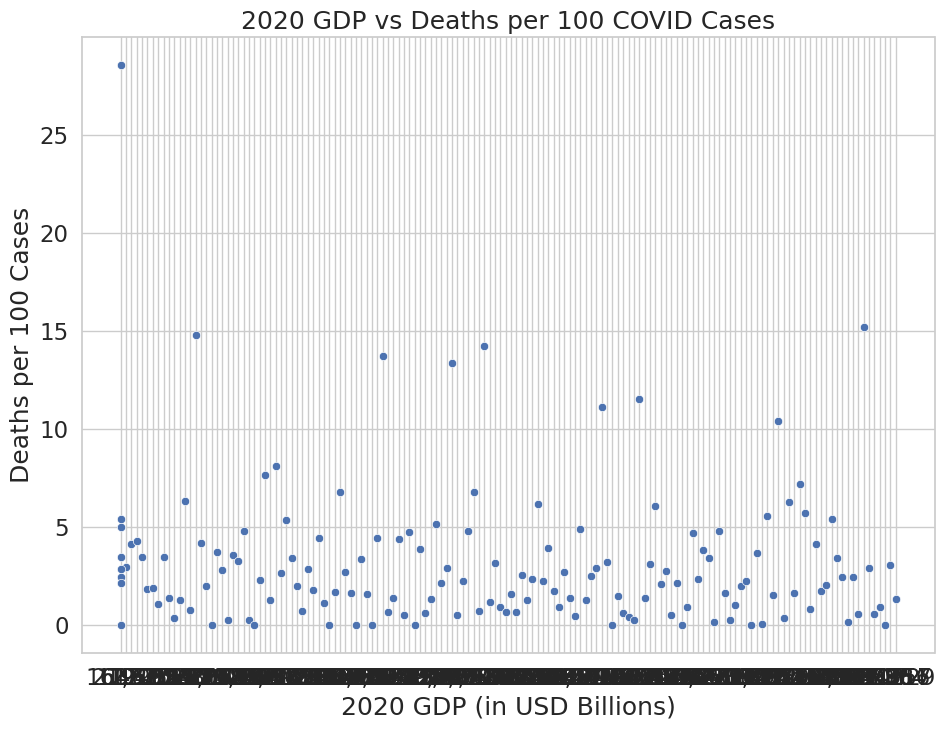

In [77]:
merged_data = pd.merge(gdp_2020_data, death_per_100_cases, left_on='Country', right_on='Country/Region')
merged_data.rename(columns={'2020': '2020 GDP'}, inplace=True)

sns.scatterplot(data=merged_data, x='2020 GDP', y='Deaths / 100 Cases')
plt.title('2020 GDP vs Deaths per 100 COVID Cases')
plt.xlabel('2020 GDP (in USD Billions)')
plt.ylabel('Deaths per 100 Cases')
plt.show()


In [ ]:
county_stats = pd.read_csv('county_statistics.csv')
county_stats['Voter Percentage'] = county_stats['total_votes20']/county_stats['VotingAgeCitizen']
county_cases = pd.read_csv('data_county_timeseries.csv')
total_cases_per_county = county_cases[county_cases['CASE_TYPE'].isin(['Booster'])].groupby(['COUNTY_NAME', 'STATE_NAME'], as_index=False)['CASES'].sum()
# Merge the datasets on county and state names
merged_data = pd.merge(county_stats, total_cases_per_county, right_on=['COUNTY_NAME', 'STATE_NAME'], left_on=['county', 'state'])

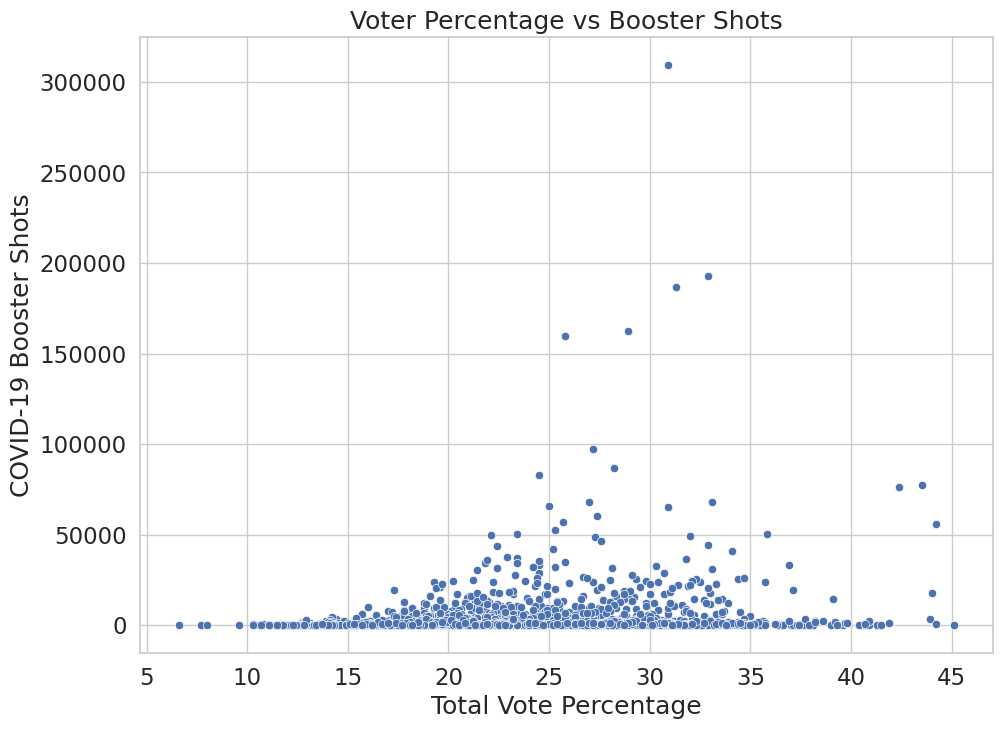

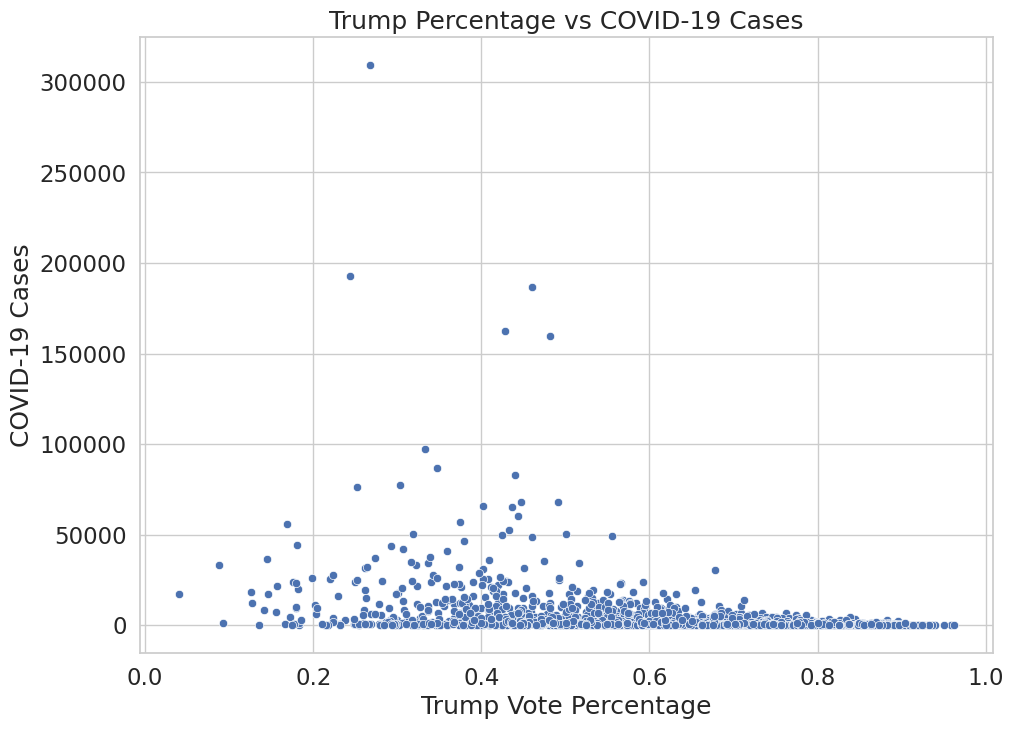

In [69]:

# Create scatter plots
sns.scatterplot(data=merged_data, x='MeanCommute', y='cases')
plt.title('Voter Percentage vs Booster Shots')
plt.xlabel('Total Vote Percentage')
plt.ylabel('COVID-19 Booster Shots')
#plt.ylim(0,10000)
plt.show()

sns.scatterplot(data=merged_data, x='percentage20_Donald_Trump', y='cases')
plt.title('Trump Percentage vs COVID-19 Cases')
plt.xlabel('Trump Vote Percentage')
plt.ylabel('COVID-19 Cases')
plt.show()

# 